This file interpret the models trained before with SHAP.

SHAP values for certain glycans will be plotted to understand how the model made predictions.

In [19]:
import numpy as np
import pandas as pd
import shap
import Functions as myfun


In [20]:
#Enter the current study name here, all files created will be stored under this folder.
YourFolder = "A1AT"
###Note: You should already have the folder created, if not, go back to 1.Simulate_LP

In [21]:
#Load Data
train_x = pd.read_excel('../Data/'+YourFolder+'/sim_CHOlp_trainx.xlsx',index_col=0).T
test_x = pd.read_excel('../Data/'+YourFolder+'/NEWlp_testx.xlsx',index_col=0).T
train_y = pd.read_excel('../Data/'+YourFolder+'/CHOgp_trainy.xlsx',index_col=0).T
test_y = pd.read_excel('../Data/'+YourFolder+'/NEWgp_testy.xlsx',index_col=0).T
test_SIMx = pd.read_excel('../Data/'+YourFolder+'/sim_NEWlp_testx.xlsx',index_col=0).T


In [22]:
#Print out all the glycans in the train_y
sorted_glycans = sorted(train_y.columns.tolist())
print("Number of glycans:", len(sorted_glycans))
print("\nSorted glycan names:")
for glycan in sorted_glycans:
    print(glycan)

Number of glycans: 74

Sorted glycan names:
Ab4GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4(Fa6)GN
Ab4GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4GN
Ab4GNb2Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN
Ab4GNb2Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4GN
Ab4GNb2Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4(Fa6)GN
Ab4GNb2Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4GN
Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4(Fa6)GN
Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN
Ab4GNb3Ab4GNb6(NNa3Ab4GNb2)Ma6(NNa3Ab4GNb4(NNa3Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN
Ab4GNb4(Ab4GNb2)Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4GN
Ab4GNb4(NNa3Ab4GNb2)Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4GN
Ab4GNb6(Ab4GNb2)Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN
Ab4GNb6(Ab4GNb2)Ma6(Ab4GNb4(Ab4GNb2)Ma3)Mb4GNb4GN
Ab4GNb6(GNb2)Ma6(GNb2Ma3)Mb4GNb4GN
GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4(Fa6)GN
GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4GN
GNb2Ma6(GNb2Ma3)Mb4GNb4(Fa6)GN
GNb2Ma6(GNb2Ma3)Mb4GNb4GN
GNb2Ma6(GNb4(GNb2)Ma3)Mb4GNb4(Fa6)GN
GNb2Ma6(GNb4(GNb2)Ma3)Mb4GNb4GN
GNb2Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4GN
GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN
GNb6(GNb2)Ma6(GNb4(GNb2)Ma3)Mb4GNb4(Fa6)GN
GNb6(GNb2)Ma6(GNb4(GNb2)Ma3)Mb4GNb4GN
Ma

### SHAP analysis start

In [23]:
#Load the model's prediction
YourLog='A1AT_log1'
# YourLog='A1At_log_BoIgG8_correctGP'
rmse,best_pred_df_raw,exp_gp_raw,best_SIMpred_df_raw = myfun.load_result_npz(YourLog,test_y.T.copy(),record_all=True)
glycan_pred_order = exp_gp_raw.index

In [24]:
#Load model (for every replicate saved)
model_list = []
for i in range(1,11):
    model = myfun.build_model(20,4,len(test_x.columns),len(test_y.columns))
    model.load_weights('../Log/'+YourLog+'/repeat'+str(i))
    model_list.append(model)

2025-08-08 11:46:41.490620: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-08 11:46:41.491215: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-08 11:46:41.491416: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-08 11:46:41.491734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-08 11:46:41.492322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 20)                180       
                                                                 
 layer1 (Dense)              (None, 20)                420       
                                                                 
 layer2 (Dense)              (None, 20)                420       
                                                                 
 layer3 (Dense)              (None, 20)                420       
                                                                 
 prediction (Dense)          (None, 74)                1554      
                                                                 
Total params: 2994 (11.70 KB)
Trainable params: 2994 (11.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### SHAP analysis on rhA1AT samples

In [42]:
#Use SHAP analysis on one randomly selected rhA1AT sample
#Get SHAP values into a SHAP_list
SHAP_list = []
X_idx = 0  #Set the index of the specific example to explain
for model in model_list:
    #Set the explainer using the Kernel Explainer (Model agnostic explainer method form SHAP).
    explainer = shap.KernelExplainer(model = model.predict, data = train_x, link = "identity")
    shap_value_single = explainer.shap_values(test_x.iloc[X_idx:X_idx+1,:], nsamples = 100)
    SHAP_list.append(shap_value_single)


10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 12ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 3ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

966/966 [==============================] - 1s 1ms/step


In [43]:
#Need to generate this every time for each sample
#Prepare for plotting SHAP values, create a dictionary that has lectins and glycans as keys, their abun% as values.
pd.set_option('display.max_rows', None)
pred_threshold = 0.02
lectin_size_dict = test_x.iloc[X_idx:X_idx+1,:].to_dict(orient='records')[0]
pred_list = []
#Get predictions from each model
for model in model_list:
    pred = model.predict(test_x.iloc[X_idx:X_idx+1,:])
    pred = pred/np.sum(pred)
#     print(pred)
    pred_list.append(pred)
#Get mean of the prediction
pred_list_mean_raw = np.mean(pred_list, axis=0)
#normalize again after getting mean
pred_list_mean_raw[pred_list_mean_raw<pred_threshold]=0
pred_mean = pred_list_mean_raw*(1/pred_list_mean_raw.sum())
glycan_size_dict = dict(zip(list(glycan_pred_order), pred_mean.tolist()[0]))
all_node_size_dict = lectin_size_dict | glycan_size_dict
# all_node_size_dict
# pred_mean

1/1 [==============================] - 0s 18ms/step


Overall sum impact of each lectin:
[0.08008366 0.6663653  0.36875379 0.2534481  0.0481027  0.60917031
 1.05612431 0.07419454]


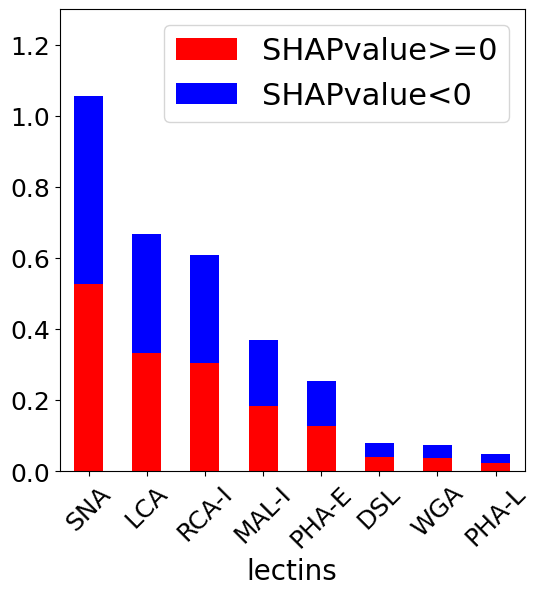

In [44]:
SHAP_list_mean=np.mean(SHAP_list, axis=0)[0].T
SHAP_list_sum =np.sum(abs(SHAP_list_mean),axis=0) 
SHAP_mean_melt = myfun.melt_SHAPvalue_for_plot(SHAP_list_mean,glycan_pred_order,train_x.columns,0)
print('Overall sum impact of each lectin:')
print(SHAP_list_sum)
myfun.barplot_sumSHAP_lectins(SHAP_mean_melt,ylim_upper=1.3,save_path="../Figure/"+YourFolder+"/SHAPsum_rhA1AT")

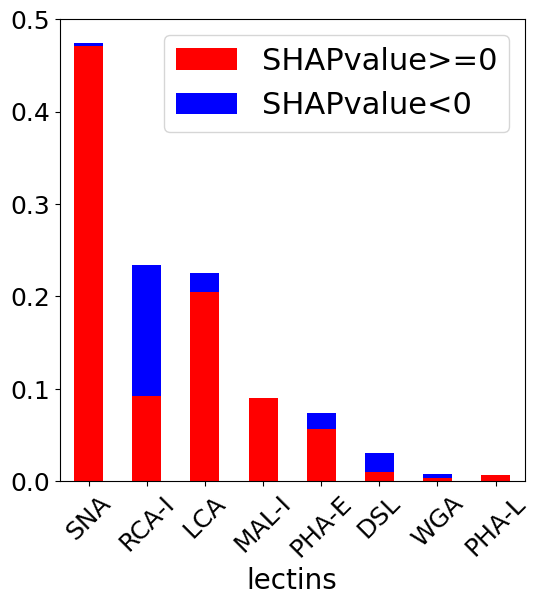

In [45]:
#Plot SHAP values sum of only glycans in the rhA1AT glycome
rhA1AT_glycans = ['Ma6(GNb2Ma3)Mb4GNb4GN', 
                  'GNb2Ma6(GNb2Ma3)Mb4GNb4GN',
                  'GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN',
                  'NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN'
                ]
SHAP_mean_melt_rhA1AT_glycans = SHAP_mean_melt[SHAP_mean_melt['glycan'].isin(rhA1AT_glycans)]
SHAP_mean_melt_rhA1AT_glycans.to_excel('../Data/'+YourFolder+'/SourceData/SHAPsum_rhA1AT_glycome.xlsx',index = True)
myfun.barplot_sumSHAP_lectins(SHAP_mean_melt_rhA1AT_glycans,0.5,save_path="../Figure/"+YourFolder+"/SHAPsum_rhA1AT_glycome")

{'DSL': (-1.2, -0.0), 'LCA': (-1.2, -0.14285714285714285), 'MAL-I': (-1.2, -0.2857142857142857), 'PHA-E': (-1.2, -0.42857142857142855), 'RCA-I': (-1.2, -0.7142857142857143), 'SNA': (-1.2, -0.8571428571428571), 'PHA-L': (-1.2, -0.5714285714285714), 'WGA': (-1.2, -1.0)}


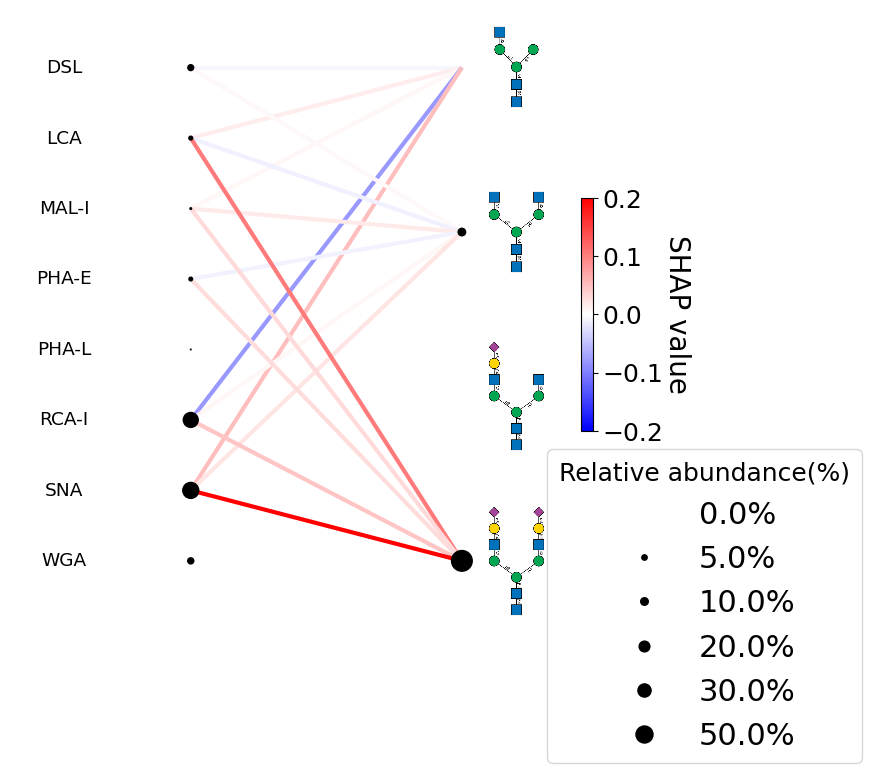

In [46]:
#Set a threshold for the SHAP values to be plotted
percentile_95 = np.percentile(abs(SHAP_list_mean), 95)
weight_plot_threshold = percentile_95
weight_plot_threshold = 0.01
#Plot values above the threshold  
SHAP_plot_rhA1AT_glycans = SHAP_mean_melt_rhA1AT_glycans.loc[abs(SHAP_mean_melt_rhA1AT_glycans['SHAPvalue']) > weight_plot_threshold]
SHAP_plot_rhA1AT_glycans.to_excel('../Data/'+YourFolder+'/SourceData/SHAPvalue_bipartite_rhA1AT.xlsx',index = True)
glycan_nodes = myfun.plot_SHAP(SHAP_plot_rhA1AT_glycans,train_x.columns,rhA1AT_glycans,all_node_size_dict,figsizeDIY=(10,8),text_pos_factor=1.35,
                               save_path="../Figure/"+YourFolder+"/SHAPvalue_bipartite_rhA1AT")
###Remember to rename the png manually after run!myfun.

### SHAP analysis on pdA1AT samples

In [53]:
#Use SHAP analysis on one randomly selected pdA1AT sample
#Get SHAP values into a SHAP_list
SHAP_list = []
X_idx = 3  #Set the index of the specific example to explain
for model in model_list:
    #Set the explainer using the Kernel Explainer (Model agnostic explainer method form SHAP).
    explainer = shap.KernelExplainer(model = model.predict, data = train_x, link = "identity")
    shap_value_single = explainer.shap_values(test_x.iloc[X_idx:X_idx+1,:], nsamples = 100)
    SHAP_list.append(shap_value_single)


10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

966/966 [==============================] - 1s 1ms/step


In [54]:
#Need to generate this every time for each sample
#Prepare for plotting SHAP values, create a dictionary that has lectins and glycans as keys, their abun% as values.
pd.set_option('display.max_rows', None)
pred_threshold = 0.02
lectin_size_dict = test_x.iloc[X_idx:X_idx+1,:].to_dict(orient='records')[0]
pred_list = []
#Get predictions from each model
for model in model_list:
    pred = model.predict(test_x.iloc[X_idx:X_idx+1,:])
    pred = pred/np.sum(pred)
#     print(pred)
    pred_list.append(pred)
#Get mean of the prediction
pred_list_mean_raw = np.mean(pred_list, axis=0)
#normalize again after getting mean
pred_list_mean_raw[pred_list_mean_raw<pred_threshold]=0
pred_mean = pred_list_mean_raw*(1/pred_list_mean_raw.sum())
glycan_size_dict = dict(zip(list(glycan_pred_order), pred_mean.tolist()[0]))
all_node_size_dict = lectin_size_dict | glycan_size_dict
# all_node_size_dict
# pred_mean

1/1 [==============================] - 0s 15ms/step


In [55]:
np.mean(SHAP_list, axis=0)[0].T.shape


(74, 8)

Overall sum impact of each lectin:
[0.20547907 0.83465898 0.29847537 0.28923043 0.06591746 0.60789715
 0.79889839 0.10100105]


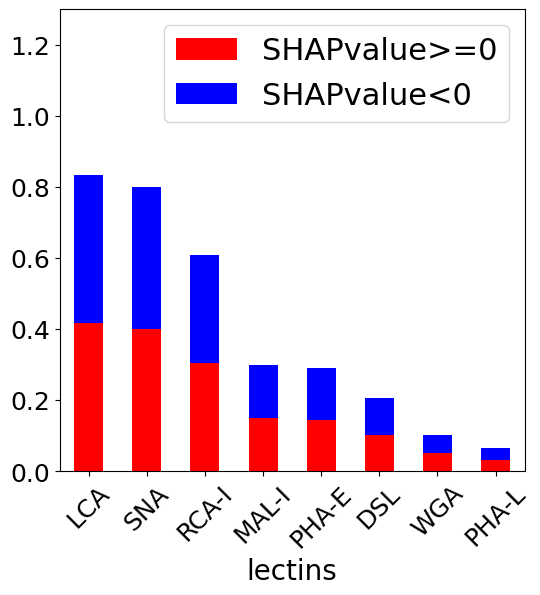

In [56]:
SHAP_list_mean=np.mean(SHAP_list, axis=0)[0].T
SHAP_list_sum =np.sum(abs(SHAP_list_mean),axis=0) 
SHAP_mean_melt = myfun.melt_SHAPvalue_for_plot(SHAP_list_mean,glycan_pred_order,train_x.columns,0)
print('Overall sum impact of each lectin:')
print(SHAP_list_sum)
myfun.barplot_sumSHAP_lectins(SHAP_mean_melt,ylim_upper=1.3,save_path="../Figure/"+YourFolder+"/SHAPsum_pdA1AT")

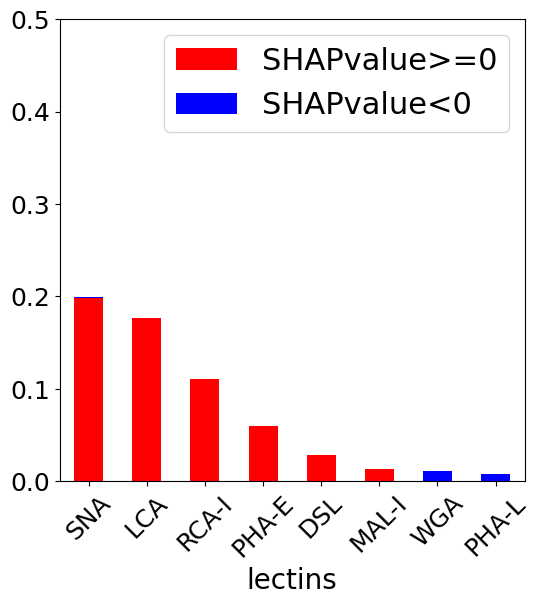

In [57]:
#Plot SHAP values sum of only glycans in the pdA1AT glycome
pdA1AT_glycans = ['NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN',
                'NNa6Ab4GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4(Fa6)GN',
                'NNa6Ab4GNb4(NNa6Ab4GNb2)Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN',
                'NNa6Ab4GNb2Ma6(NNa6Ab4GNb4(NNa6Ab4GNb2)Ma3)Mb4GNb4(Fa6)GN'
                ]
SHAP_mean_melt_pdA1AT_glycans = SHAP_mean_melt[SHAP_mean_melt['glycan'].isin(pdA1AT_glycans)]
SHAP_mean_melt_pdA1AT_glycans.to_excel('../Data/'+YourFolder+'/SourceData/SHAPsum_pdA1AT_glycome.xlsx',index = True)
myfun.barplot_sumSHAP_lectins(SHAP_mean_melt_pdA1AT_glycans,0.5,save_path="../Figure/"+YourFolder+"/SHAPsum_pdA1AT_glycome")

{'DSL': (-1.2, -0.0), 'LCA': (-1.2, -0.14285714285714285), 'MAL-I': (-1.2, -0.2857142857142857), 'PHA-E': (-1.2, -0.42857142857142855), 'RCA-I': (-1.2, -0.7142857142857143), 'SNA': (-1.2, -0.8571428571428571), 'WGA': (-1.2, -1.0), 'PHA-L': (-1.2, -0.5714285714285714)}


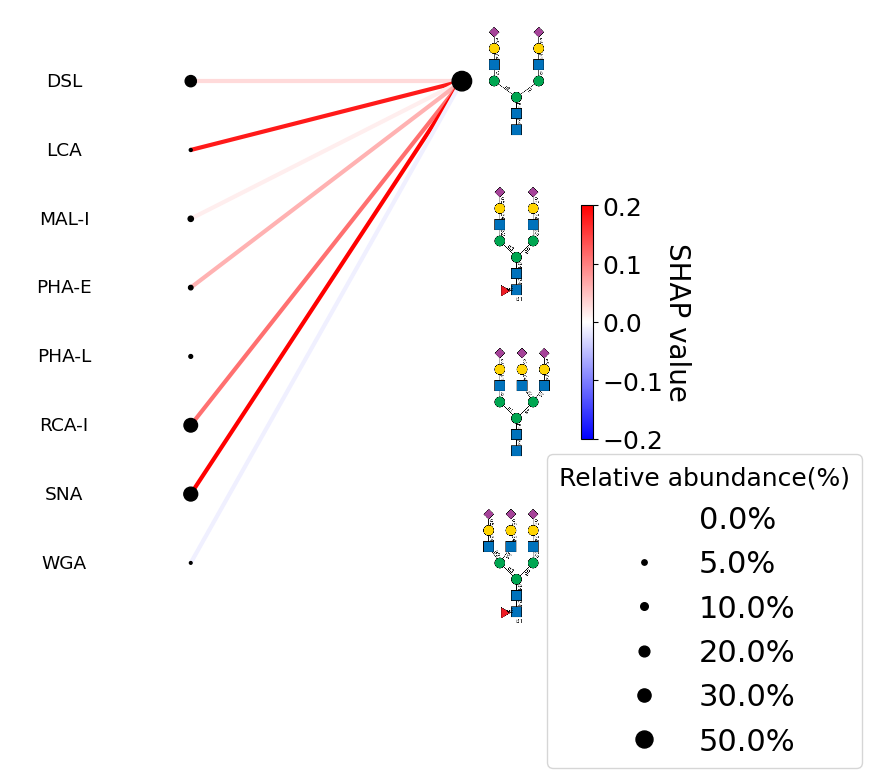

In [58]:
#Set a threshold for the SHAP values to be plotted
percentile_95 = np.percentile(abs(SHAP_list_mean), 95)
weight_plot_threshold = percentile_95
weight_plot_threshold = 0.01
#Plot values above the threshold  
SHAP_plot_pdA1AT_glycans = SHAP_mean_melt_pdA1AT_glycans.loc[abs(SHAP_mean_melt_pdA1AT_glycans['SHAPvalue']) > weight_plot_threshold]
SHAP_plot_pdA1AT_glycans.to_excel('../Data/'+YourFolder+'/SourceData/SHAPvalue_bipartite_pdA1AT.xlsx',index = True)
glycan_nodes = myfun.plot_SHAP(SHAP_plot_pdA1AT_glycans,train_x.columns,pdA1AT_glycans,all_node_size_dict,figsizeDIY=(10,8),text_pos_factor=1.35,
                               save_path="../Figure/"+YourFolder+"/SHAPvalue_bipartite_pdA1AT")
###Remember to rename the png manually after run!myfun.